Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Data Processing Complete

Training Samples:   1942
Validation Samples: 431
Image Shape:        (500, 500, 3)
Training Classes:   {'crack': 0, 'missing-head': 1, 'paint-off': 2}
Validation Classes: {'crack': 0, 'missing-head': 1, 'paint-off': 2}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 500, 500, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 250, 250, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 250, 250, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │   125,960,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,054,467 (480.86 MB)

 Trainable params: 126,054,467 (480.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.3800 - loss: 2.7408 - val_accuracy: 0.5777 - val_loss: 0.9496
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.5697 - loss: 0.9648 - val_accuracy: 0.6543 - val_loss: 0.7726
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.6516 - loss: 0.8025 - val_accuracy: 0.6241 - val_loss: 0.7671
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.6613 - loss: 0.7481 - val_accuracy: 0.6450 - val_loss: 0.7428
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.6819 - loss: 0.7364 - val_accuracy: 0.6032 - val_loss: 0.7651
Training complete and model saved.
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.5922 - loss: 0.7665

Validation Accuracy: 0.6450
Validation Loss: 0.7428


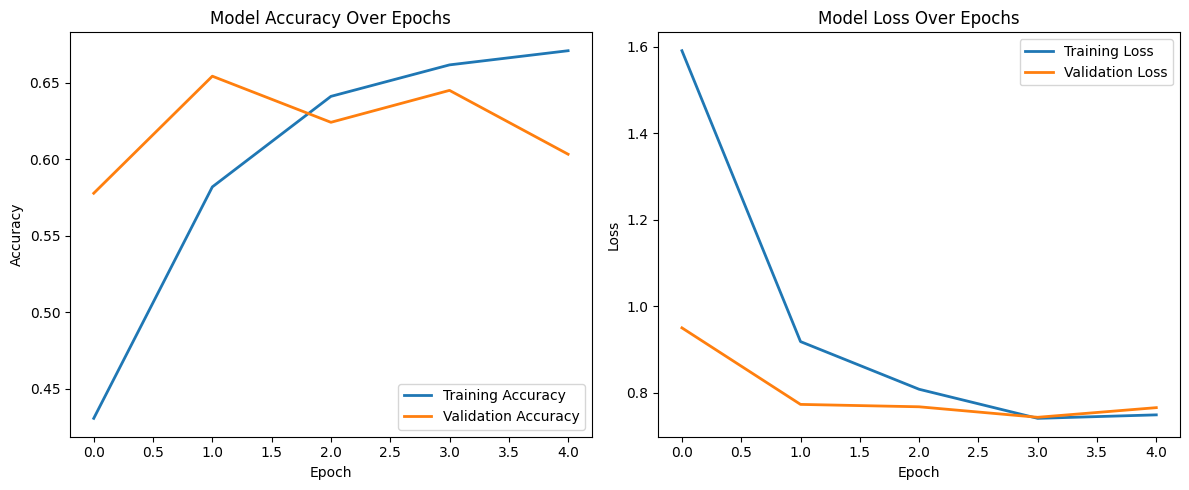

Model performance plot saved as 'model_performance.png'


In [9]:
# STEP 1: DATA PROCESSING
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define constants
IMG_SIZE = (500, 500)
INPUT_SHAPE = (500, 500, 3)
BATCH_SIZE = 32

# Dataset directories
train_dir = "/content/Data/train"
valid_dir = "/content/Data/valid"

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generators
train_gen = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

valid_gen = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Display
print("Data Processing Complete\n")
print(f"Training Samples:   {train_gen.samples}")
print(f"Validation Samples: {valid_gen.samples}")
print(f"Image Shape:        {INPUT_SHAPE}")
print(f"Training Classes:   {train_gen.class_indices}")
print(f"Validation Classes: {valid_gen.class_indices}")

# STEP 2: NEURAL NETWORK ARCHITECTURE DESIGN
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# CNN model
def build_custom_cnn(input_shape=(500, 500, 3), num_classes=3):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten + Dense Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


# Initialize model
model = build_custom_cnn(input_shape=INPUT_SHAPE, num_classes=3)

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model summary
model.summary()

# Callbacks
checkpoint_path = "/content/best_model.keras"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True)
]

# Train model (5 epochs)
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=valid_gen,
    callbacks=callbacks
)

# Save
model.save("/content/final_model.keras")
print("Training complete and model saved.")

# STEP 3: HYPERPARAMETER ANALYSIS + STEP 4: MODEL EVALUATION

# Model performance
val_loss, val_acc = model.evaluate(valid_gen)
print(f"\nValidation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Plot and save performance curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("/content/model_performance.png", dpi=300)
plt.show()

print("Model performance plot saved as 'model_performance.png'")
